In [1]:
#知识点
#1.词云图
#2.文本分词

In [2]:
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库
import seaborn as sns

In [4]:
fn=open('D:/2022_py_code/03代码 (2)/03代码/data/03死亡病例病情介绍.txt','rt')

In [5]:
string_data = fn.read()  #读出整个文件
fn.close()  #关闭文件

In [6]:
#对文本进行分词

In [7]:
seg_list_exact = jieba.cut(string_data, cut_all = False)#精确模式分词

In [9]:
object_list = []
remove_words = [u'2020',u'患者',u'治疗',u'医院',u'XX',u'转入',u'宣告',u'出现',u'20',u'入院',u'支持',u'22',u'收入',
u'18',u'10',u'13',u'就诊',u'12',u'金银',u'日因',u'明显',u'17',u'21',u'15',u'23',u'既往',u'19',u'11',u'报告',u'对症',u'进行性',u'给与'] # 自定义去除词库

In [10]:
for word in seg_list_exact: # 循环读出每个分词
#    if word not in remove_words: # 如果不在去除词库中
     if len(word)>=2 and word not in remove_words:        
        object_list.append(word) # 分词追加到列表

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\yang'zai\AppData\Local\Temp\jieba.cache
Loading model cost 1.272 seconds.
Prefix dict has been built successfully.


In [11]:
#对词频进行统计

In [12]:
word_counts = collections.Counter(object_list) #对分词做词频统计

In [14]:
word_counts_top40 = word_counts.most_common(40) #获取前40最高频的词
print (word_counts_top40) #输出检查

[('死亡', 20), ('呼吸', 17), ('发热', 15), ('呼吸机', 14), ('呼吸衰竭', 13), ('肺炎', 11), ('咳嗽', 11), ('抗感染', 11), ('临床', 11), ('加重', 11), ('辅助', 11), ('持续', 11), ('病情', 10), ('插管', 10), ('武汉市', 9), ('气管', 9), ('通气', 9), ('心率', 9), ('CT', 9), ('双肺', 9), ('感染', 8), ('抢救无效', 7), ('乏力', 7), ('重症', 6), ('抢救', 6), ('呼吸困难', 6), ('下降', 6), ('肺部', 6), ('胸部', 5), ('给予', 5), ('糖尿病', 5), ('吸氧', 5), ('胸闷', 5), ('新型', 4), ('冠状病毒', 4), ('病例', 4), ('病史', 4), ('ICU', 4), ('机械', 4), ('主动脉', 4)]


In [15]:
x=[x[0] for x in word_counts_top40] #统计top40个关键字
y=[x[1] for x in word_counts_top40] #统计top40个关键字出现的次数

In [16]:
#进行美观方面的修改
label = []
for i in range(len(x)):
    label_vertical = []
    for j in range(len(x[i])):
        label_vertical.append(x[i][j]+"\n")#每个中文加入换行符，实现竖排显示
    label.append(''.join(label_vertical))#列表转换为字符串
# print(label)

In [19]:
sns.set(font_scale=1.5,font='SimHei',style='white') #黑体1.5号、图片背景色为白
fig = plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

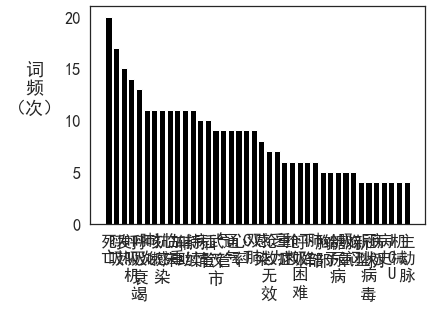

In [20]:
plt.bar(label,y,color='black')
# plt.xticks(fontsize=20)  #改变标签显示角度，防止标签重叠
plt.ylabel('词\n频\n（次）',rotation=360,labelpad=30)    #设置Y轴名称,并让标签文字上下显示
plt.show()

In [21]:
#进行词云图展示

In [26]:
mask = np.array(Image.open("D:/2022_py_code/03代码 (2)/03代码/data/03病毒背景图.jpg"))

In [27]:
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
    margin=10, width=4000,height=6000, 
    mask=mask  # 设置背景图
)

In [28]:
wc.generate_from_frequencies(word_counts) # 从字典生成词云

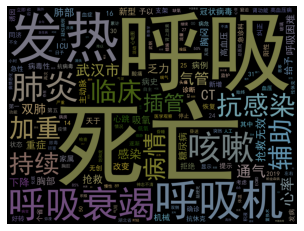

In [29]:
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

In [30]:
wc.to_file('D:/2022_py_code/Afterclass_practice/03死亡病例词云图.jpg')